<a href="https://colab.research.google.com/github/Prasun1608/Computer-Vision-Projects/blob/main/Multi_Class_Image_Classification_Image10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the data and Necessary Libraries**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


**Viewing a few Images in the Dataset**

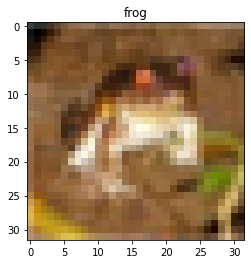

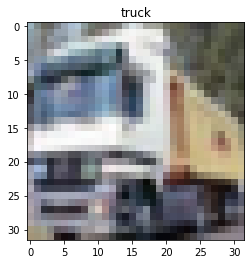

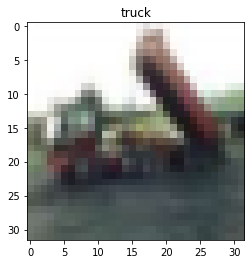

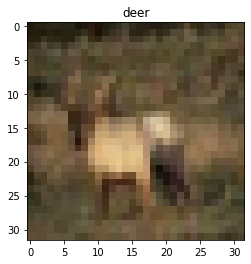

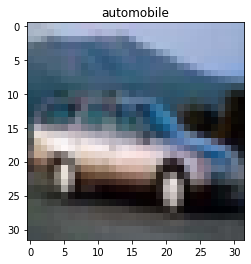

In [ ]:
for i in range(5):
  plt.imshow(x_train[i])
  plt.title(words[int(y_train[i])])
  plt.show()



In [ ]:
words={}

for i in range(len(class_names)):
  words[i]=class_names[i]



'airplane'

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D,Flatten, Dropout



In [ ]:
#Here each image is of size 32x32
#We do scaling of the dataset so that our model can train faster. The pixel range of a colour image is 0-255
#We divide each pixel by 255.0 (not 255 as it is a floating point operation) so that it lies between 0 and 1

x_train= x_train/255.0
x_test= x_test/255.0

print(x_train.shape)
print(x_test.shape)


#Here this 50000 is the no of images in our train dataset
#32x32 is the height*width of image and depth is 3 (one for each layers of red, blue and green) 

(50000, 32, 32, 3)
(10000, 32, 32, 3)


**Creating A CNN Model**

In [ ]:
#Building our CNN Model
#CNN structure
#CNN has 3 layers
#1) Conv2D layer: This is the convoluational layer. It extracts all the features of the image/datasets.
#2) Pooling layer: This is MaxPooling layers which reduces the dimensionality of the image. It prevents Over-fitting. It prevents small changes in our data to create a big impact on model.
#3) Flattening Layer: This tranfsorms our data in 1D layer and feeds it into a Fully Connected Dense Layer.

#This FC Dense layer then performs our predicitions of the image.
#A good model has multiple Convulational and Max Pooling layers


#While creating a NN model, there are 2 generally used API's:
#1) Sequential API: It allows us to create a model layer wose and add it to sequential class. The drawback is we cannot use it to create model where we want to use  multiple input sources and get output at different locations.
#2) Functional API: It allows us to use/create multiple input and output models.


model= Sequential()

#First Layer
model.add(Conv2D(activation='relu', input_shape=[32,32,3], kernel_size=3, filters=32, padding='same'))

#We use Conv2D means convulational takes place on 2 axis. It extens the convoulation to the three stara of Red, Blue and Green.
#The other type is Conv1D. It is genrally used in texts and Conv1D is mostly used for images.

#filter: This shows the no of filters from which CNN model and Convoulation layer will learn from. From each such filter the Convolutional Layer will
# learn something abt the image(like boundary, filter, hue, shape etc). the value of parameter should be in power of 2.

#Kernel_size: It is the filter which will move through the image and extract features/parts using dot product. It is height x width of that filter (usuall odd nos:3,5,7..). 
#Here filter.kernel size is 3x3

#Padding: It is of 2 types, (same and valid). In Valid padding, there is no padding of zeros on the boundary of image.
# So when convolution takes place, there is loss of data as some features cannot be convulated.
#In SAME padding, a layer of zeros is padded on the boundary of image, so there is no loss of data. Moreover, dimension of the output of the image after convulation is same as input of the image. Since in inital layers, we cannot losse data, we use SAME padding.
#activation= This is use dto specify the acy=tivation function. In DNN, we need to ensure that our model is non linear and comlex.
# We need complex functions to solve this non linearity. This is done using activation layer. Atleast one of this layer is neede in model. 
#If we do not use this layer, our model will be a simple regression model and would not achieve the desired results as will be unable to fit the non linear parts well.

model.add(Conv2D(filters=32, activation='relu', kernel_size=3, padding='same'))

#Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

#Pooling is used to reduce the size of image while keeping imp features intact. Reduces compulational in the model. 
#The conv layer keeps inf abt all excat feactures intact. And thus, not so imp features are also located perfectly. As a result, even a small change in feature may lead to big change in the model. The max Pooling narrows down the scope of this by taking only imp features in account. 
#We can use average pooling or max pooling
#Pool size means take max/average value from a given pool of dimensions. The pool travers image as per the value of strides.

#Here we have used padding as Valid so it does not add a layer of zeros and we are ready to sacrifice some information as job of Max Pool is to reduce the image size

#Stride means how much jump the pool size will make. if stride=2 pool jumps 2 rows and 2 columns at a time. If stride=1, it moves consicutevely in all rows.columns.

model.add(Conv2D(filters=64, activation='relu', kernel_size=3, padding='same'))

model.add(Conv2D(filters=128, activation='relu', kernel_size=3, padding='same'))
model.add(MaxPool2D(pool_size=2, padding='valid', strides=2))


model.add(Flatten())
#This will flatten the 2D conv layer into a 1D array. (Converts 3D image vector into a 1D vector)
#Because after the stack of layers, a fully connected Dense layers needs to be passed. It requeries input in 1D, so flattening is imp.

#After flattening, a Dense layer is added to fully connect all the neurons. It feeds all output from previous neurons. The units mentioned shows the no of neurons the model 
#is going to use.
#A dropout layer is also added to prevent the overfitting of the model and to better generalise the model. After training, neurons are not affected highly by the weight of other neurons.

model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))



In [ ]:
#Loss fun: 'sparse catergorical cross entropy' is used when classes are mutually exclusive and totally distinct. 
#categorical is used when a label can have multiple classes. Here, in our case classes are totalyy distinct so we use sparse fun.

#Optimizers we generally use is ADAM (Adaptive Learning Rate Method): It uses initial of the gradient to adapt to the learning rate. ADAM is now used instead of SGD as it can upodate weights after each iteration.

model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, epochs=50)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 8192)             

**Model Testing**

In [ ]:
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print(test_accuracy)


313/313 [==============================] - 2s 5ms/step - loss: 0.9754 - sparse_categorical_accuracy: 0.7881
0.788100004196167


**Makig some Predictions**

In [ ]:
predicted= model.predict(x_test)

In [ ]:
import numpy as np
list(np.arange(30,40))

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39]

Actual: frog
Predicted: frog


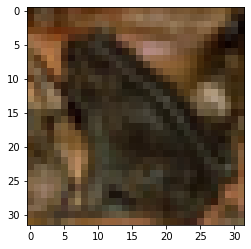

Actual: dog
Predicted: dog


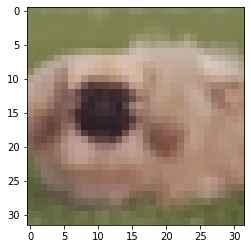

Actual: deer
Predicted: bird


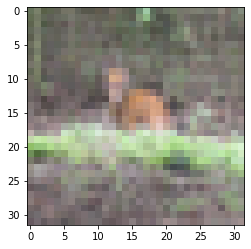

Actual: dog
Predicted: cat


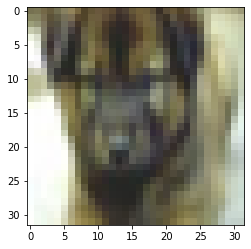

Actual: truck
Predicted: truck


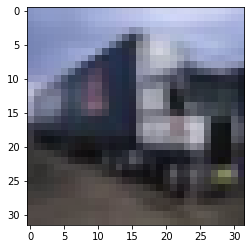

Actual: bird
Predicted: ship


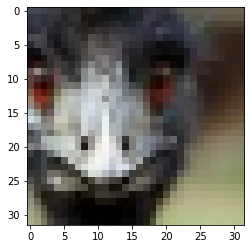

Actual: deer
Predicted: deer


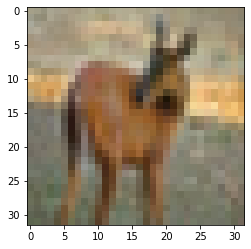

Actual: automobile
Predicted: truck


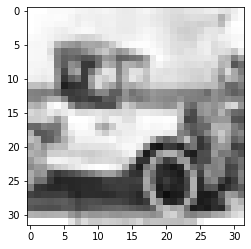

Actual: truck
Predicted: truck


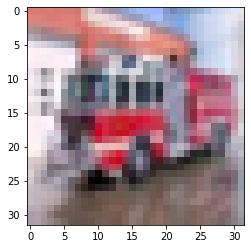

Actual: dog
Predicted: dog


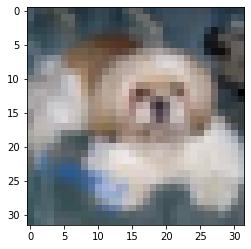

In [ ]:
for i in list(np.arange(30,40)):
  plt.imshow(x_test[i])
  
  print('Actual:', words[int(y_test[i])])

  print('Predicted:' ,words[np.argmax(predicted[i], axis=0)])
  plt.show()
  